### VaR - Monte Carlo method

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf  
import datetime as dt
import pandas as pd


In [15]:
# Set time for timeframe analysis
years = 15
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=365 * years)

In [16]:
# Create list of ticker 
tickers = ['SPY','BND','GLD','QQQ','VTI']

In [28]:
# Download the daily adjusted closing prices of the ticker symbols
adj_close_df = pd.DataFrame()

data = yf.download(
    tickers,
    start=start_date,
    end=end_date,
    auto_adjust=False,
    progress=False
)

adj_close_df = data['Adj Close']
adj_close_df.head()


5 Failed downloads:
['QQQ', 'VTI', 'GLD', 'BND', 'SPY']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Ticker,BND,GLD,QQQ,SPY,VTI
Date,,,,,


In [29]:
# Calculate daily log returns

log_returns = np.log(adj_close_df / adj_close_df.shift(1))
log_returns = log_returns.dropna()
log_returns.head()

Ticker,BND,GLD,QQQ,SPY,VTI
Date,,,,,


In [ ]:
# Calculate expected return

def expected_return(weight, log_returns):
    return np.sum(weight * log_returns.mean())

In [31]:
# Calculate portfolio std dev

def portfolio_std(weight, cov_matrix):
    variance = weight.T @ cov_matrix @ weight
    return np.sqrt(variance)

In [32]:
#  Create cov matrix for tickers
cov_matrix = log_returns.cov()
cov_matrix

c:\Users\Abhay Uppal\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\Abhay Uppal\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:137: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
c:\Users\Abhay Uppal\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\frame.py:11211: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
c:\Users\Abhay Uppal\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\Abhay Uppal\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Ticker,BND,GLD,QQQ,SPY,VTI
Ticker,,,,,
BND,NaN,NaN,NaN,NaN,NaN
GLD,NaN,NaN,NaN,NaN,NaN
QQQ,NaN,NaN,NaN,NaN,NaN
SPY,NaN,NaN,NaN,NaN,NaN
VTI,NaN,NaN,NaN,NaN,NaN


In [33]:
# Create equally weightred portfolio and find total portfolio expected return and std dev
portfolio_values = 1000000
weights = np.array([1/len(tickers)] * len(tickers))
portfolio_exp_return = expected_return(weights, log_returns)
portfolio_std_dev = portfolio_std(weights, cov_matrix)

In [34]:
# Generating random Z scores for Monte Carlo Simulation
def random_z_scores():
    return np.random.normal(0, 1)

In [40]:
# Create functions for Gain/Loss and VaR calculation    

days = 5

def gain_loss(portfolio_value, std_dev, z_score, days):
    return (portfolio_value * portfolio_exp_return * days) + (portfolio_value * std_dev * np.sqrt(days) * z_score)

In [41]:
# Run Monte Carlo Simulation

simulations = 10000
scenario_results = []
for i in range(simulations):
    z_score = random_z_scores()
    result = gain_loss(portfolio_values, portfolio_std_dev, z_score, days)
    scenario_results.append(result)

In [43]:
# Specify confidence level and calculate VaR
confidence_level = 0.95
VaR = -np.percentile(scenario_results, (1 - confidence_level) * 100)
VaR

np.float64(nan)

ValueError: autodetected range of [nan, nan] is not finite

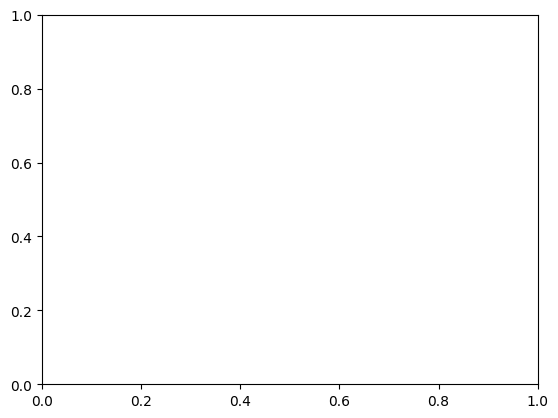

In [45]:
# Plotting results
plt.hist(scenario_results, bins=50, density=True)
plt.xlabel('Portfolio Gain/Loss')
plt.ylabel('Frequency') 
plt.title(f'distribution of Portfolio Gain/Loss over {days} days')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2)
plt.legend()
plt.show()  